## Q&A CHATBOT USING LANGUAGE SERVICE

### Name : M.Rachel

# PROBLEM STATEMENT

You need to select a domain and application and build a Custom Question Answering Bot using Azure Cognitive Services Language Studio, deploy it to Azure and attach it to a channel like Facebook.

## AZURE LANGUAGE SERVICES
 
 Azure Language services is a unified cloud-based platform that provides Natural Language Processing (NLP) features for understanding and analyzing text. It encompasses previously available Azure AI services such as Text Analytics, QnA Maker, and LUIS. This service offers preconfigured and customizable features to help build intelligent applications using the web-based Language Studio, REST APIs, and client libraries. Some of the available features include Named Entity Recognition (NER), sentiment analysis, key phrase extraction, language detection, and custom text classification, among others.

### IMPORTING AND INSTALLING NECESSARY LIBRARIES

In [3]:
# Importing library to view image
from IPython.display import Image as img

In [5]:
# Install the azure question answering library
!pip install azure-ai-language-questionanswering

# dotenv library
!pip install python-dotenv

   ---------------------------------------- 0.0/113.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.1 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/113.1 kB 660.6 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/113.1 kB 544.7 kB/s eta 0:00:01
   -------------------------------------  112.6/113.1 kB 939.4 kB/s eta 0:00:01
   -------------------------------------  112.6/113.1 kB 939.4 kB/s eta 0:00:01
   -------------------------------------  112.6/113.1 kB 939.4 kB/s eta 0:00:01
   -------------------------------------- 113.1/113.1 kB 411.4 kB/s eta 0:00:00


In [8]:
import os
from dotenv import load_dotenv
from azure.core.credentials import AzureKeyCredential

# To create new project
from azure.ai.language.questionanswering.authoring import AuthoringClient

# to create a question-answering client, and to ask questions using the knowledge base
from azure.ai.language.questionanswering import QuestionAnsweringClient
from azure.ai.language.questionanswering import models as qna

## CREATING RESOURCE GROUP AND LANGUAGE SERVICES RESOURCE

* First we need to login to azure login portal [Azure](https://login.microsoftonline.com/organizations/oauth2/v2.0/authorize?redirect_uri=https%3A%2F%2Fportal.azure.com%2Fsignin%2Findex%2F&response_type=code%20id_token&scope=https%3A%2F%2Fmanagement.core.windows.net%2F%2Fuser_impersonation%20openid%20email%20profile&state=OpenIdConnect.AuthenticationProperties%3D0wK7RuUWzlH_W24fhEWvak0mqLDQlgBowEs6OvE2QcoCLDX_oZAdciQIJ8_Mlsw8Ud69exa0SGTYKoxFFsvKQWhj4Ohj4tHDQRxWKfEwZhZMS4annAitnuzJufo2nlzpoKUwaaRWzrKOgmrfCdMaP_QP9izWe_fg4AzpAYM9H0KEMixilVYYw6ylnRksF-rIDbHQZCcCqNv_r-htKHZ5NiRGzDE9EO85h9okLWJLXAiDk_hT0wTagiI7qWdQH1_1_cgR_oYTrsSB9zk6n2AlEMXntWqnZj4nF7rXdA9lvVOr_CSWv-8Si5JWZpo-5QjbSkyPJ_zeF1u32tENRkgNHhaN8b0c5tvFjhXMZ_Kp9U6Fc7Kujm25C1a_u-Fxtpp4ETFJqrmPJr_a_h3R5HW7z6llkFrtp1MGtG_5QbCinRAn8sEkBX8cSgMMTEGbN8uovhZHWsUu7C6BsO5XgNQAd5Qc9MUKZE0Kv66L77F_583WnNJb1XYNnodjyGjsxBcm&response_mode=form_post&nonce=638495354986128150.NTQ2NTQxZTMtMWQ2YS00NGE1LTgyYWUtZWY3MDcyNjUyOTQxZDdmZjdmYWUtMTU5OC00YjI0LWIwMTItNGJhMGFjNDY3YzU1&client_id=c44b4083-3bb0-49c1-b47d-974e53cbdf3c&site_id=501430&client-request-id=f80561ab-a328-491a-a0e8-71280e8241a2&x-client-SKU=ID_NET472&x-client-ver=7.2.0.0) with the Azure account we have created.
* Create Resource Group register with Random Name, select appropriate region and click 'review+create', let the validation is passed successfully to create Resource Group.

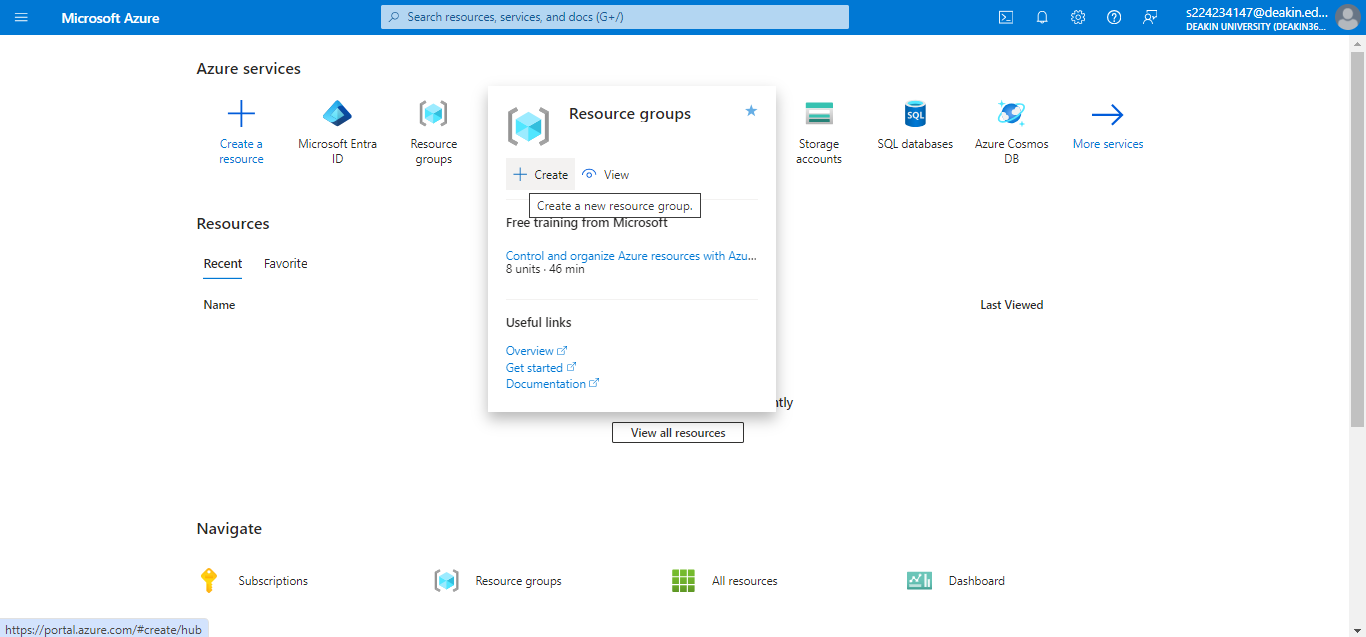

## RESOURCE GROUP
* Giving Resource Group name as **'T6-RG'**
* Region as **'(US) East US'**
* Select 'Review+create'

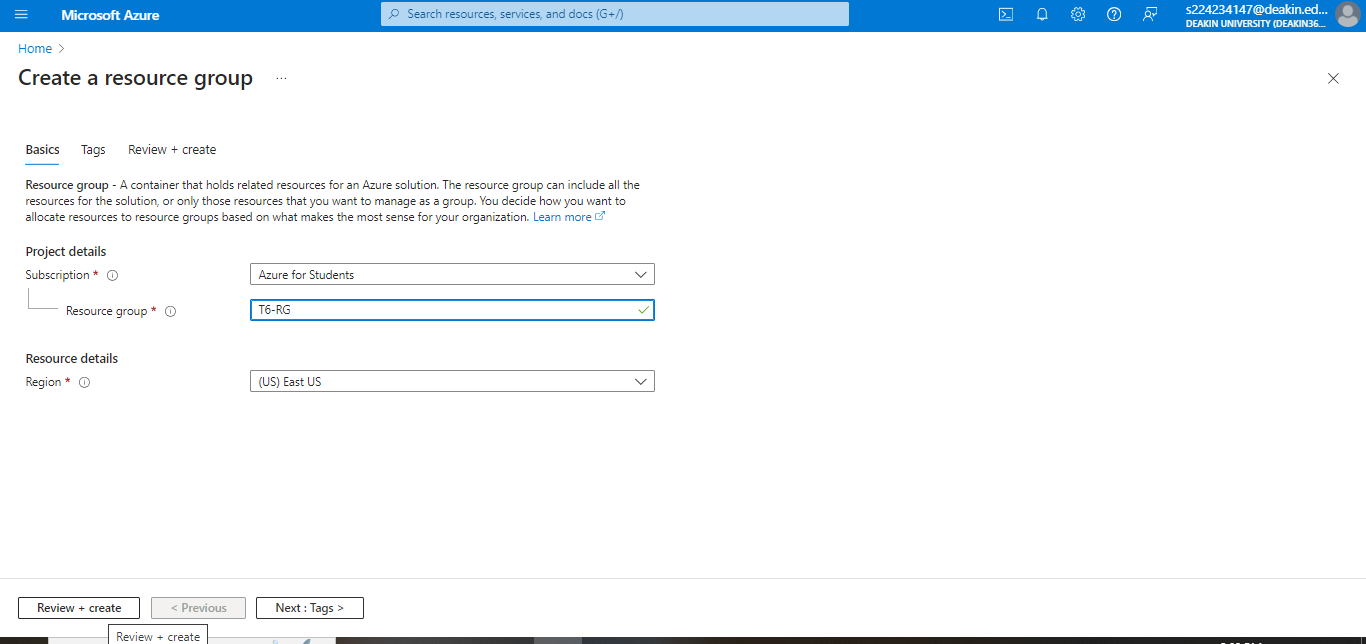

## CREATING RESOURCE FOR LANGUAGE SERVICES
* After Resource Group is Created "+Create" to create New Resource for Language Services.

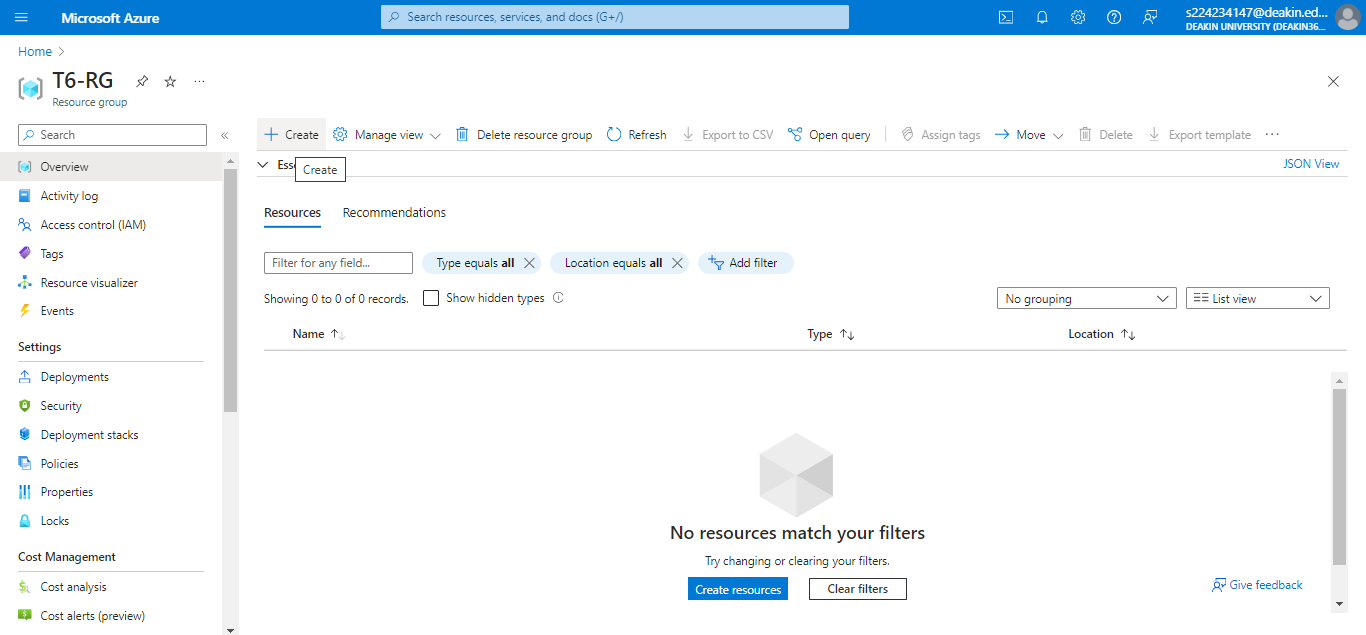

## CREATE LANGUAGE SERVICE RESOURCE
* First search in search bar as 'Language Service' 
* Click create in the dropdown of Language Service.

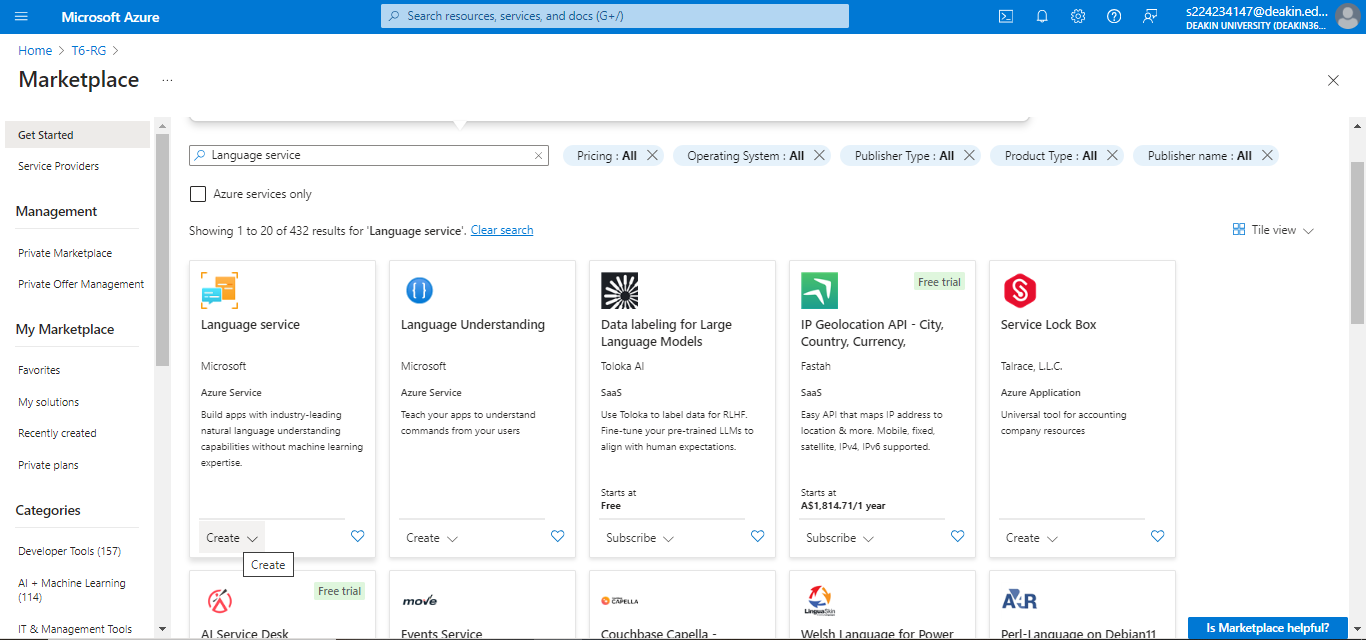

## SELECT ALL THE ADDITIONAL FEATURES FOR CREATING 'LS' RESOURCE.

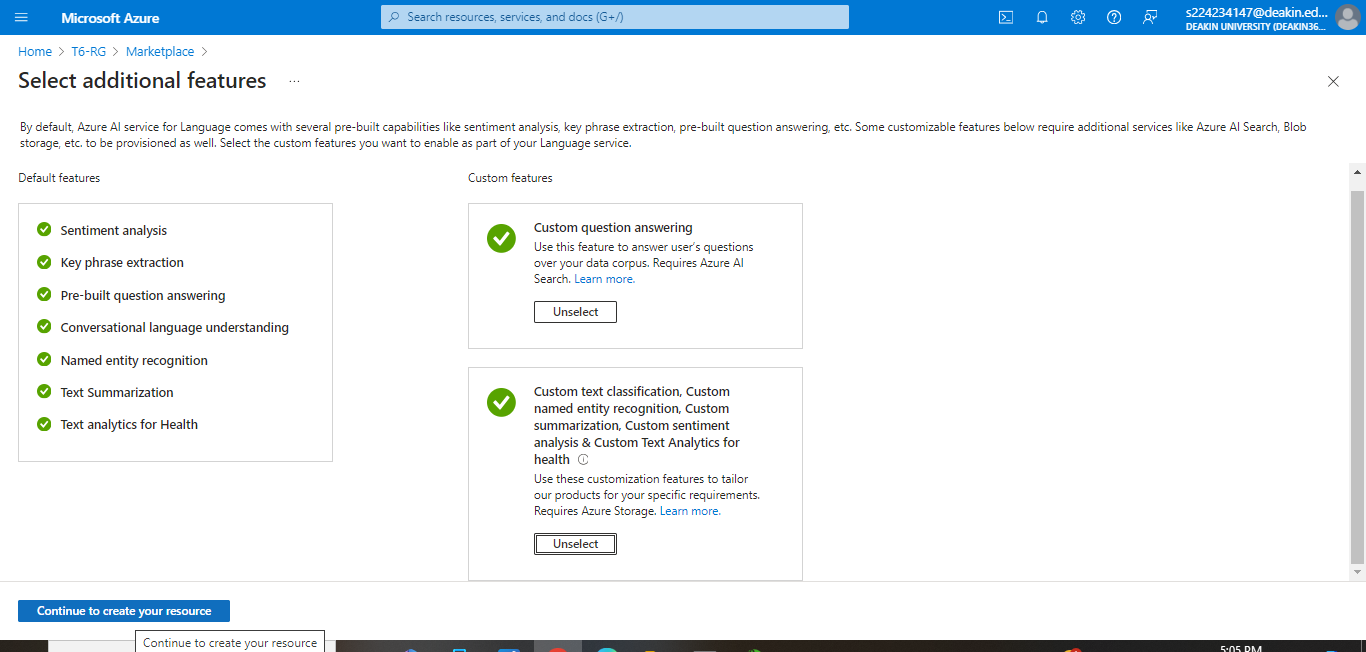

## CREATING LANGUAGE 
* Resource Group same as we created.
* In Instance Details, the name given as **'T6-LS-WS-Rachel'**
* Setting the region same as resource group 'East US'
* Setting Pricing tier **'Free F0'** as per available subscription.
* Creating New Storage Account and name it as **'mylanguageservicestorage'**.
* Setting Storage Account type as **'Premium LRS'**
* click the check box for review and acknowledge the terms of responsible AI notice
* Review+Create.

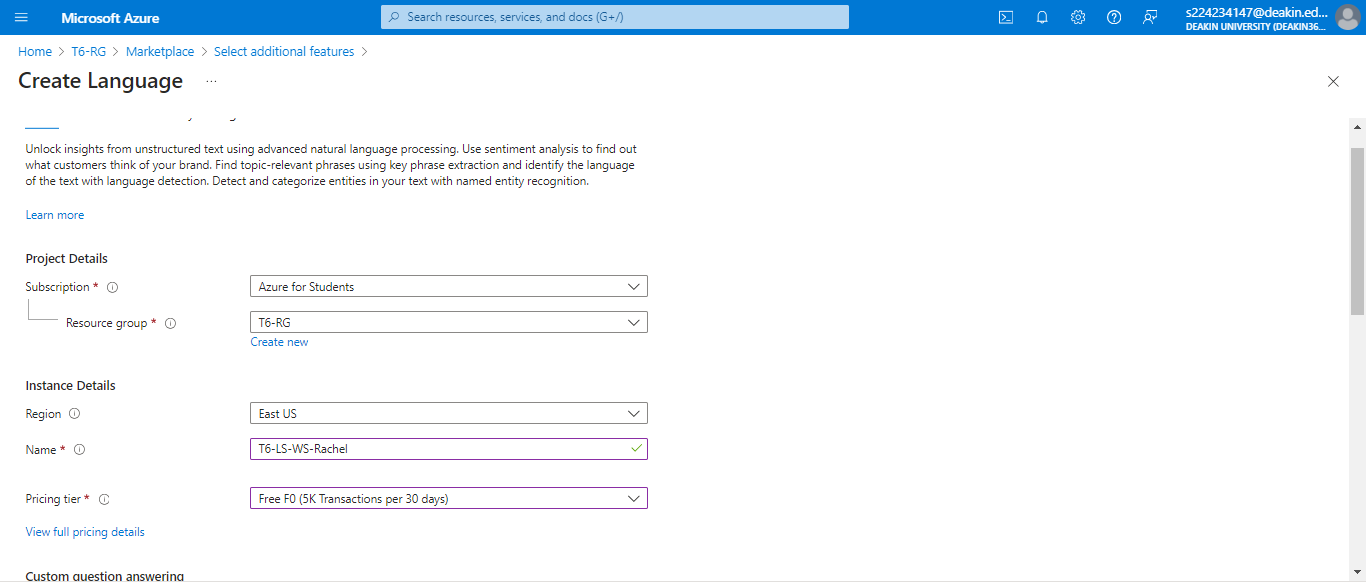

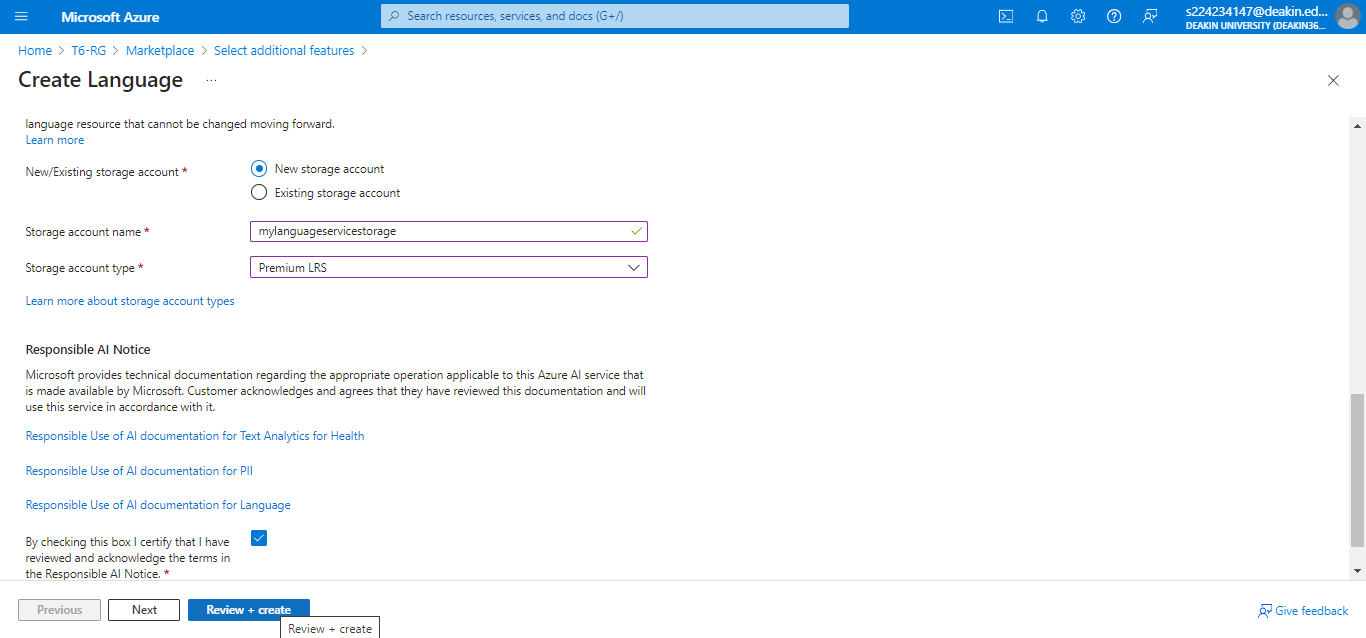

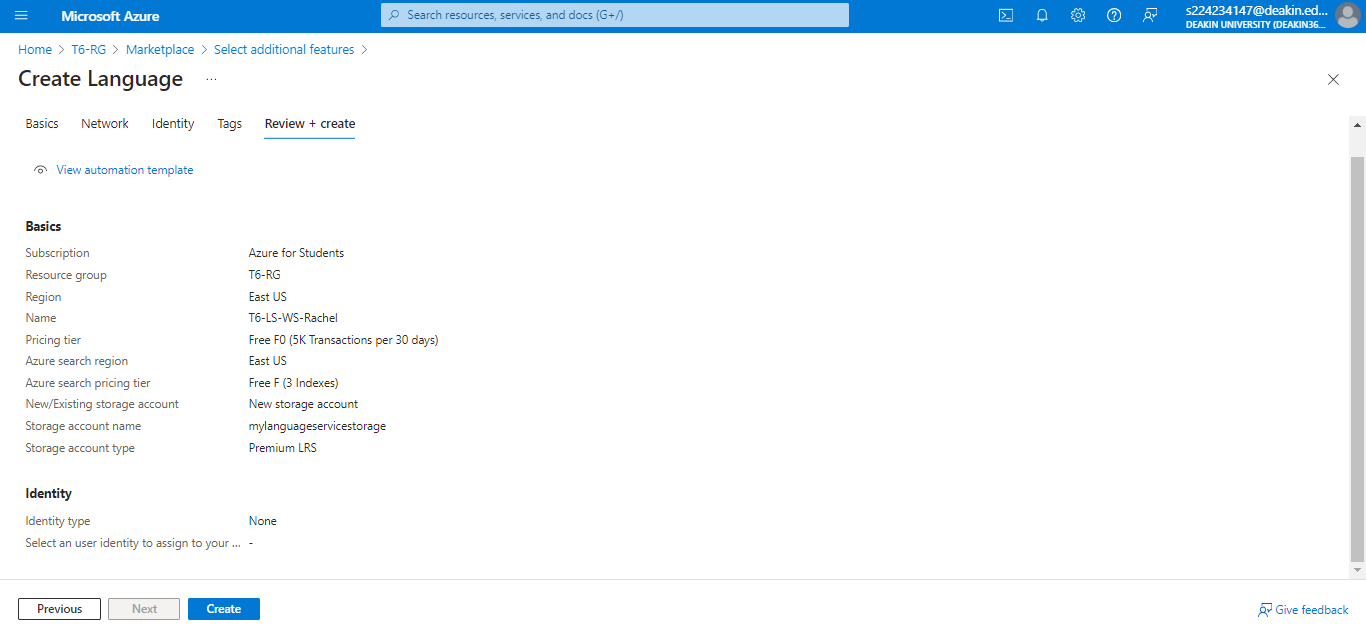

## Successfully Created 'Language Service Resource' with the Deployment is complete.

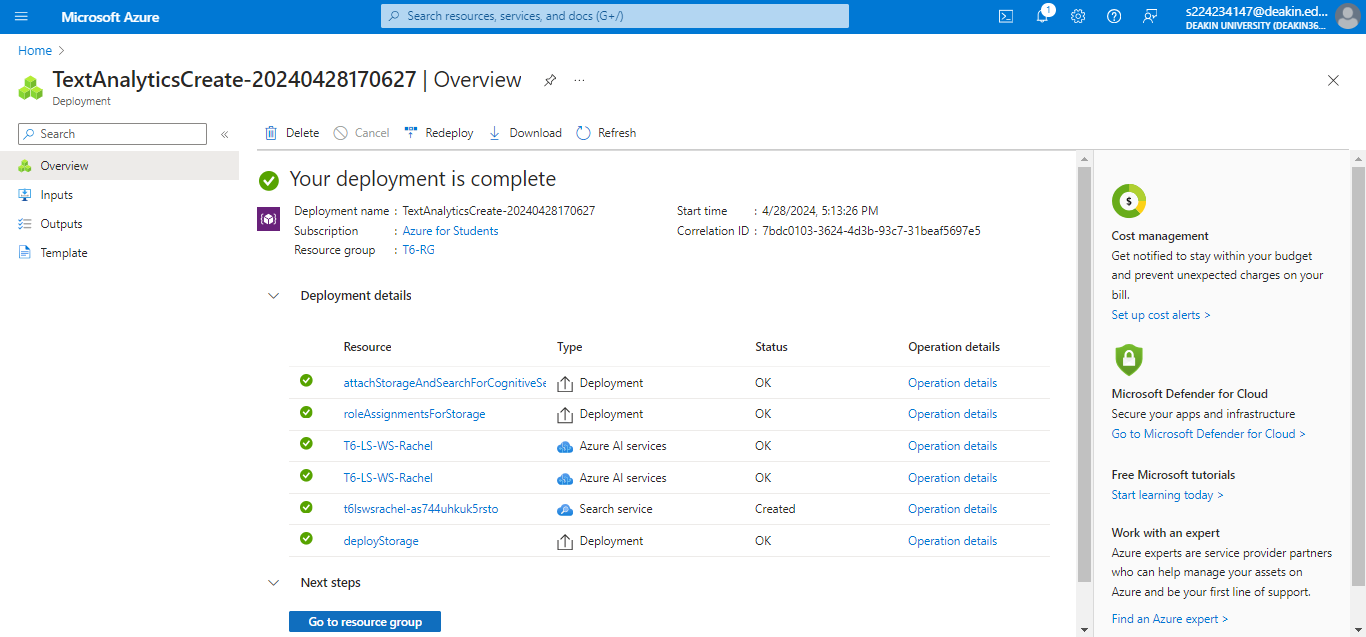

## Three Created Resources

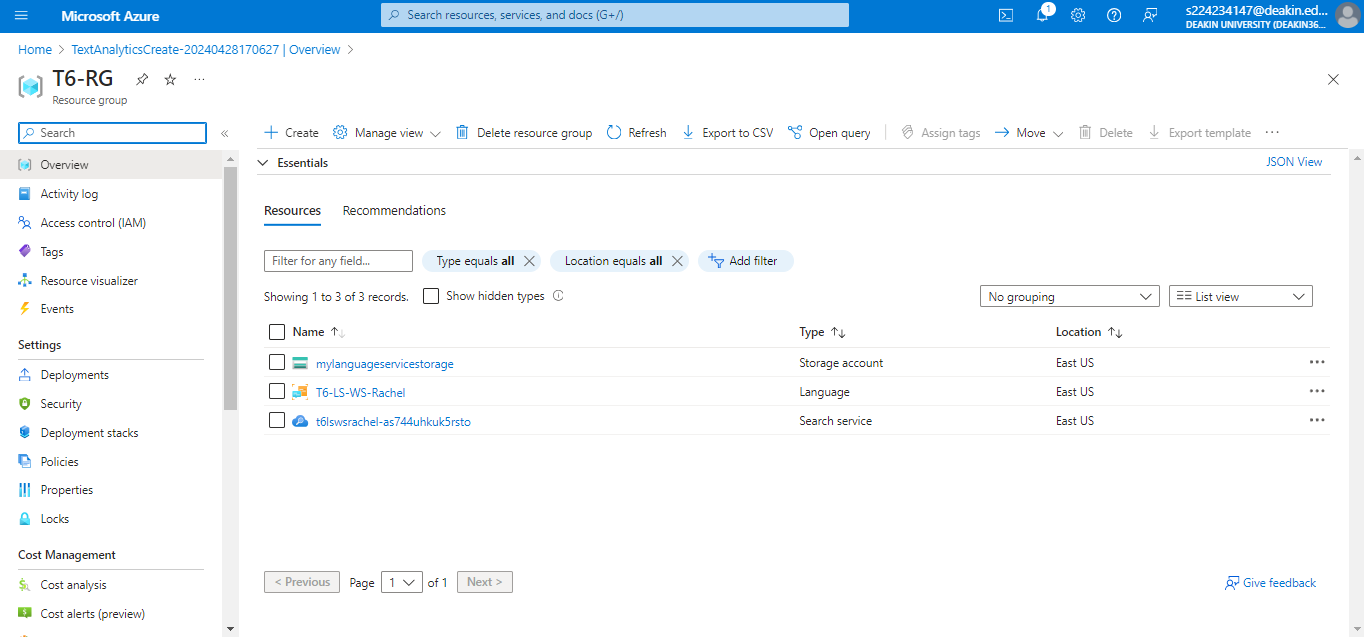

## COPY THE 'KEY 1' AS SUBSCRIPTION KEY AND ENDPOINT AS ENVIRONMENT VARIABLES IN EDITOR LIKE NOTEPAD.

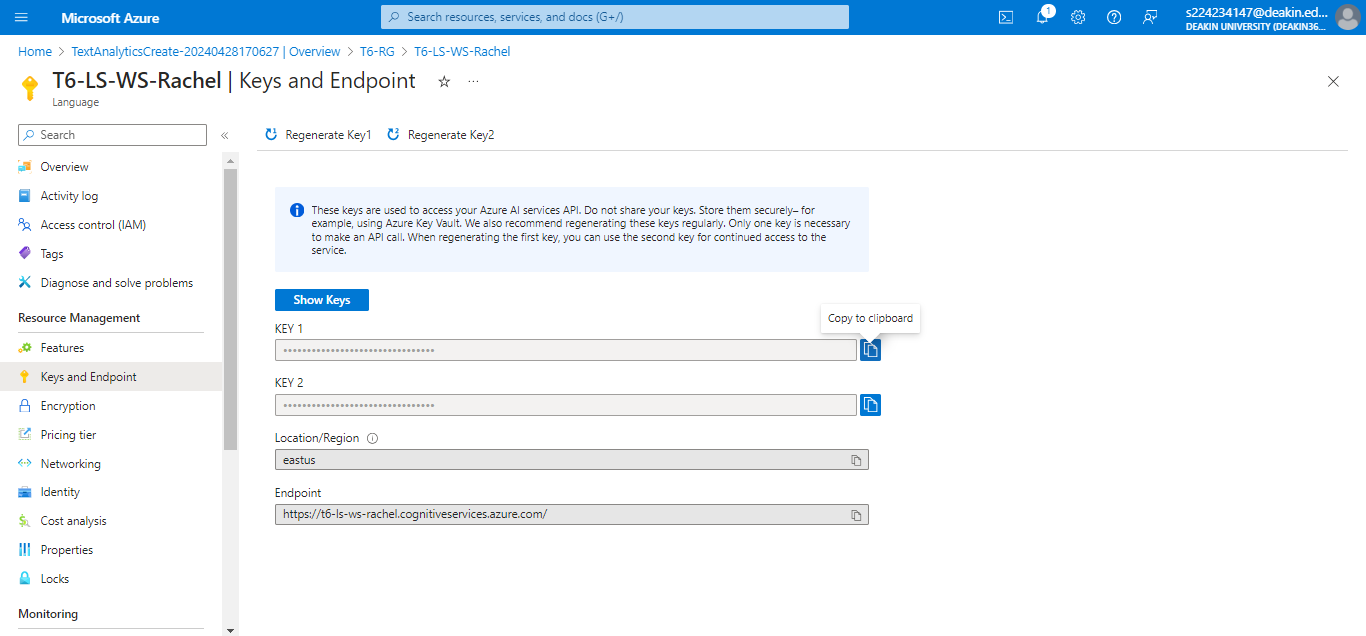

## SAVE IT AS .env AND STORE IT IN THE FOLDER TO ACCESS FROM LOCAL JUPYTER NOTEBOOK.
* Due to Not visible in Folder but it is present, the below screenshot of .env file that saved with the subscription key and endpoint.

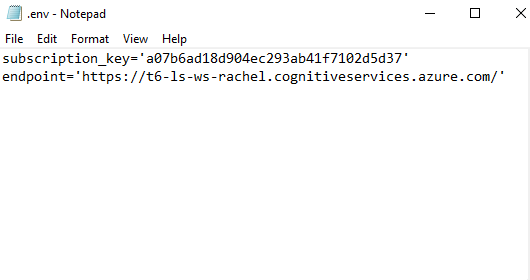

In [11]:
# get service secrets
load_dotenv()
endpoint = os.environ.get("endpoint")
key = os.environ.get("subscription_key")

# Please note, we will create two clients, one for creating the project (Authoring) and one for querying it (Question Answering)

authoring_client = AuthoringClient(endpoint, AzureKeyCredential(key))
qna_client = QuestionAnsweringClient(endpoint, AzureKeyCredential(key))

## IN LANGUAGE RESOURCE ACCESS THE LANGUAGE STUDIO.

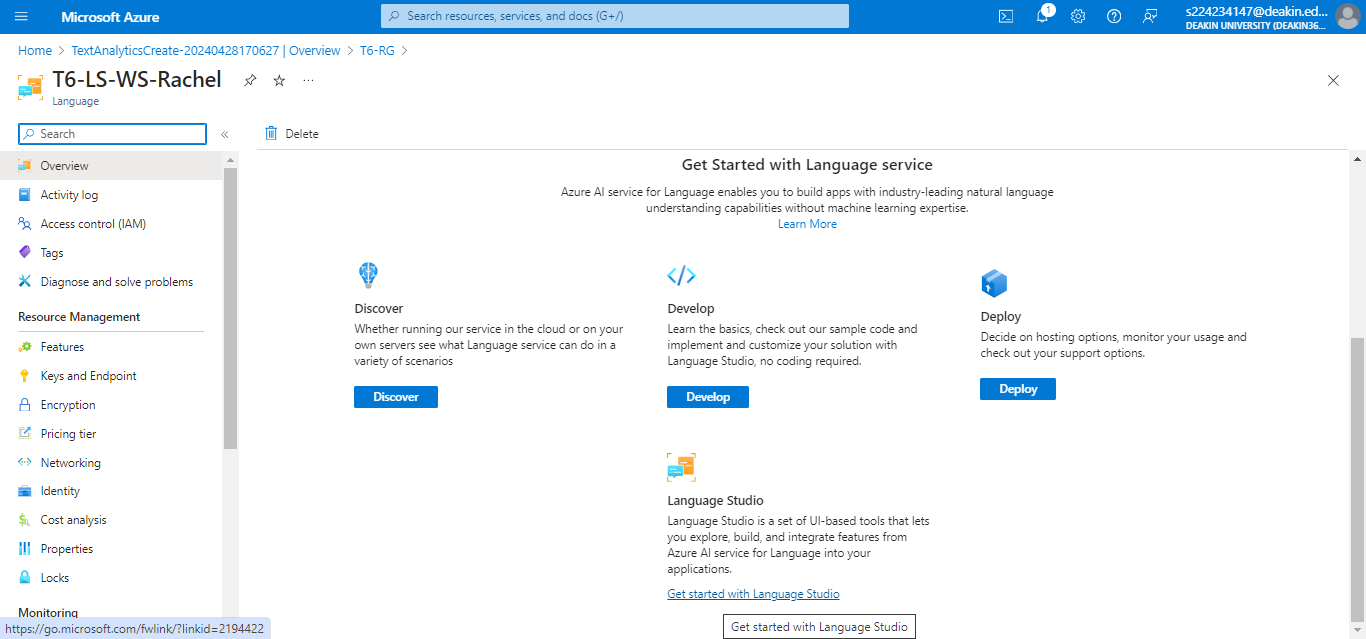

### Sign in with the Azure Subscription
### Select Understand questions and conversational Language
### Access the 'Custom Question Answering'

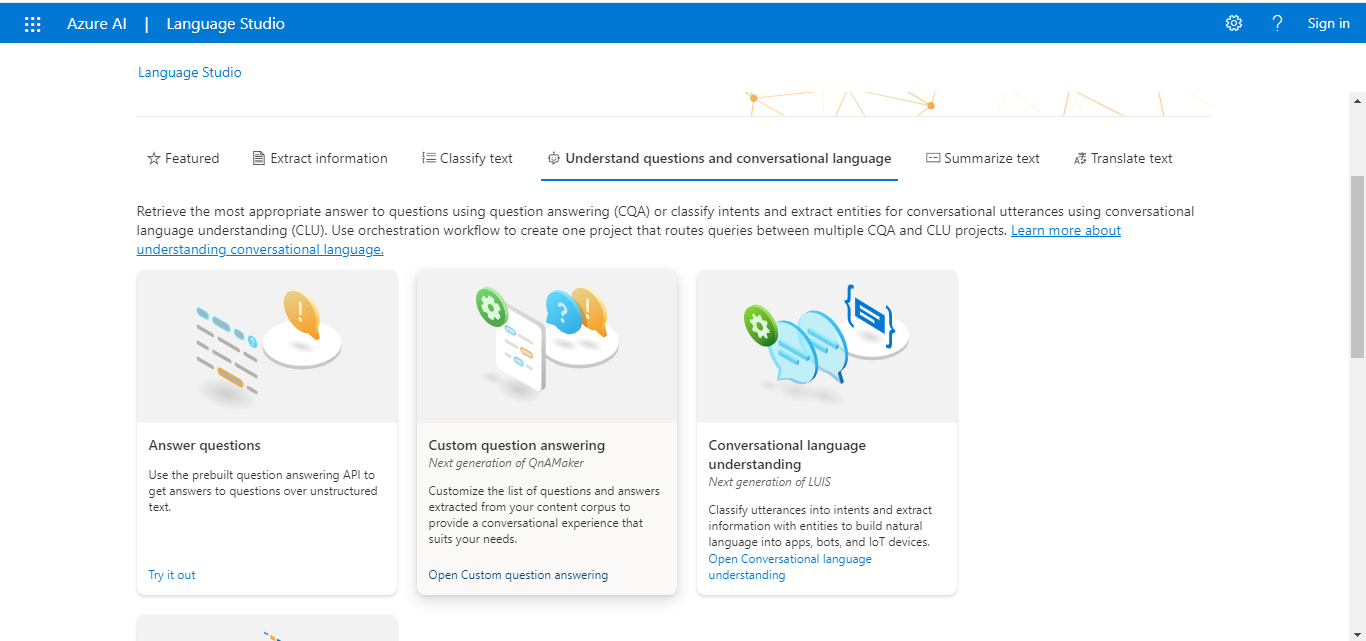

## CREATING THE PROJECT.
### STEP 1:
* Through AuthoringClient we access the azure through the endpoint and azurekeycredential
* Project Name = **'FlipKartFAQs'**
* Description = 'FAQs related to Flipkart(Manage My order and Returns&Refunds)
* Language = 'english'
* print the project details.

### STEP 2: Adding the 2 knowledge bases as sources
* Display Name: Flipkart Manage my order FAQ'
* url: 'https://www.flipkart.com/helpcentre/manageOrder/i/3'

* Display Name: Flipkart Returns&Refunds FAQ
* url: 'https://www.flipkart.com/helpcentre/returnOrder/i/4'
* Print the source details.

### STEP 3: Deploy the project 
* Print the deployment details



In [18]:
# Create new project, add knowldege base and deploy it.

authoring_client = AuthoringClient(endpoint, AzureKeyCredential(key))

with authoring_client:

    # Step 1: create project

    print("\n********************** Creating a new project *********************")
    project_name = "FlipKartFAQs"
    project = authoring_client.create_project(
        project_name=project_name,
        options={
            "description": "FAQs related to Flipkart(Manage My order and Returns&Refunds)",
            "language": "en",
            "multilingualResource": True,
            "settings": {
                "defaultAnswer": "no answer"
            }
        })

    # Output 1: View the project details

    print("view created project info:")
    print("\tname: {}".format(project["projectName"]))
    print("\tlanguage: {}".format(project["language"]))
    print("\tdescription: {}".format(project["description"]))
    
# Step 2: Add a knowledge base
    print("\n********************* Adding a knowledge base *********************")

    # We are adding two knowledge bases here. A minimum of one knowledge base is required.
    # Please note, the knowledge base cannot have more than 3 sources (urls, files) in Free Tier.
    # In other words, you can add upto three sources/indices in one project, under the free tier.

    update_sources_poller = authoring_client.begin_update_sources(
        project_name=project_name,
        sources=[
            {
                "op": "add",
                "value": {
                    "displayName": "Flipkart manage my order FAQ",
                    "sourceUri": "https://www.flipkart.com/helpcentre/manageOrder/i/3",
                    "sourceKind": "url"
                }
            },
            {
                "op": "add",
                "value": {
                    "displayName": "Flipkart Returns & Refunds FAQ",
                    "sourceUri": "https://www.flipkart.com/helpcentre/returnOrder/i/4",
                    "sourceKind": "url"
                }
            }
        ]
    )
    update_sources_poller.result()

    # Output 2: list sources
    print("\nlist project sources")
    sources = authoring_client.list_sources(
        project_name=project_name
    )
    for source in sources:
        print("knowledge base name: {}".format(source["displayName"]))
        print("\tsource: {}".format(source["source"]))
        print("\tsource Uri: {}".format(source["sourceUri"]))
        print("\tsource kind: {}".format(source["sourceKind"]))

# Step 3: deploy the project

    print("\n********************** Deploying the project **********************")

    deployment_poller = authoring_client.begin_deploy_project(
        project_name=project_name,
        deployment_name="production"
    )
    deployment_poller.result()

    # list all deployments
    deployments = authoring_client.list_deployments(
        project_name=project_name
    )

    print("view project deployments")
    for d in deployments:
        print(d)
    


********************** Creating a new project *********************
view created project info:
	name: FlipKartFAQs
	language: en
	description: FAQs related to Flipkart(Manage My order and Returns&Refunds)

********************* Adding a knowledge base *********************

list project sources
knowledge base name: Flipkart manage my order FAQ
	source: https://www.flipkart.com/helpcentre/manageOrder/i/3
	source Uri: https://www.flipkart.com/helpcentre/manageOrder/i/3
	source kind: url
knowledge base name: Flipkart Returns & Refunds FAQ
	source: https://www.flipkart.com/helpcentre/returnOrder/i/4
	source Uri: https://www.flipkart.com/helpcentre/returnOrder/i/4
	source kind: url

********************** Deploying the project **********************
view project deployments
{'deploymentName': 'production', 'lastDeployedDateTime': '2024-04-28T13:06:43Z'}


## Accessing the Language studio with the existing language resource.

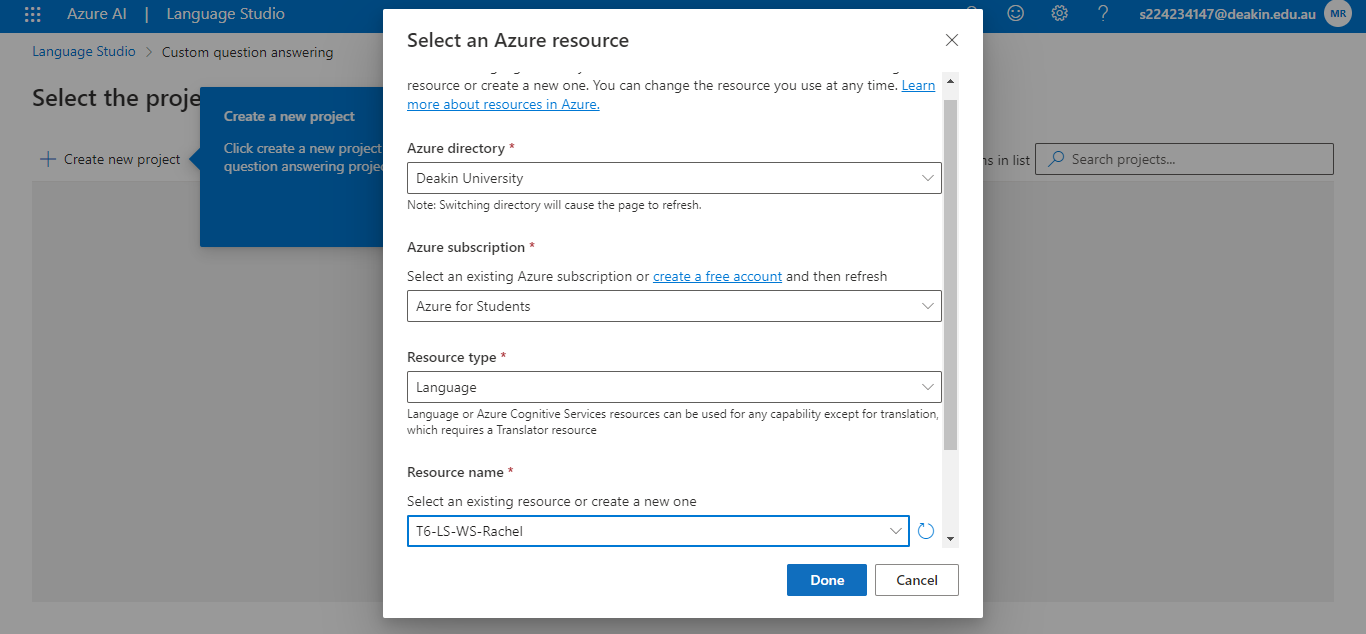

## PROJECT IS CREATED

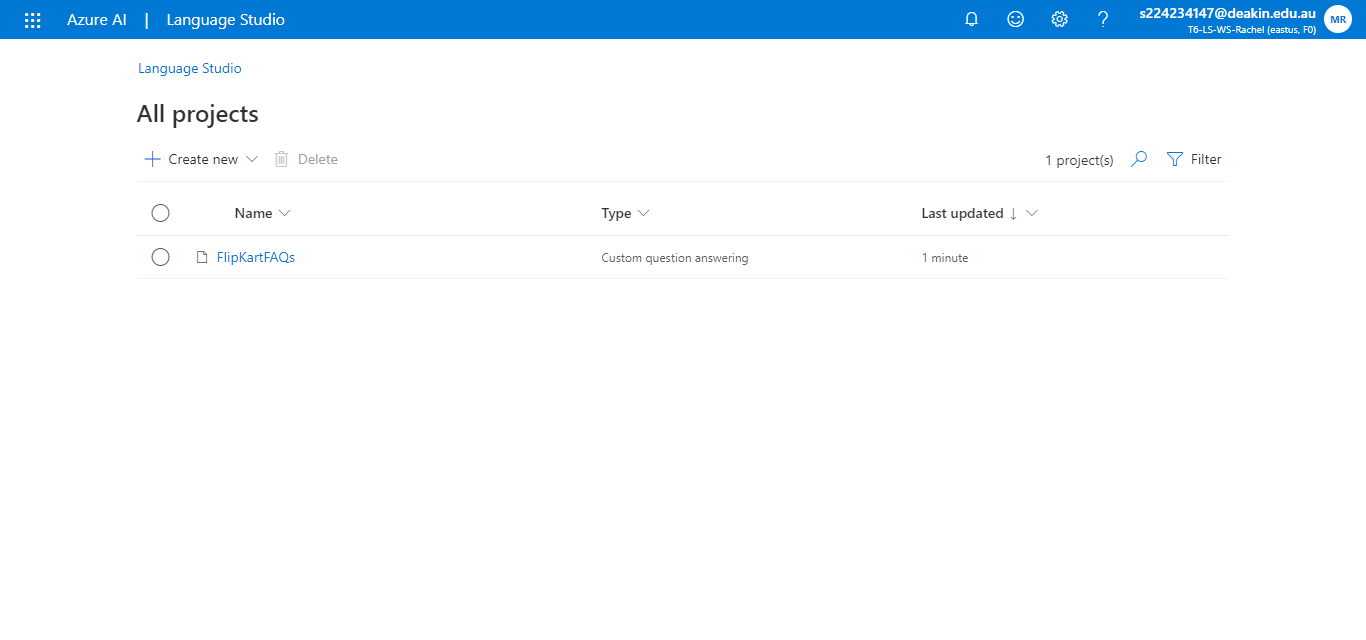

## ALL THE SOURCES OF KNOWLEDGE BASE IS STORED AND WITH THE EDITORIAL FILE CONTAINS GREETINGS IN THE MANAGE RESOURCES .

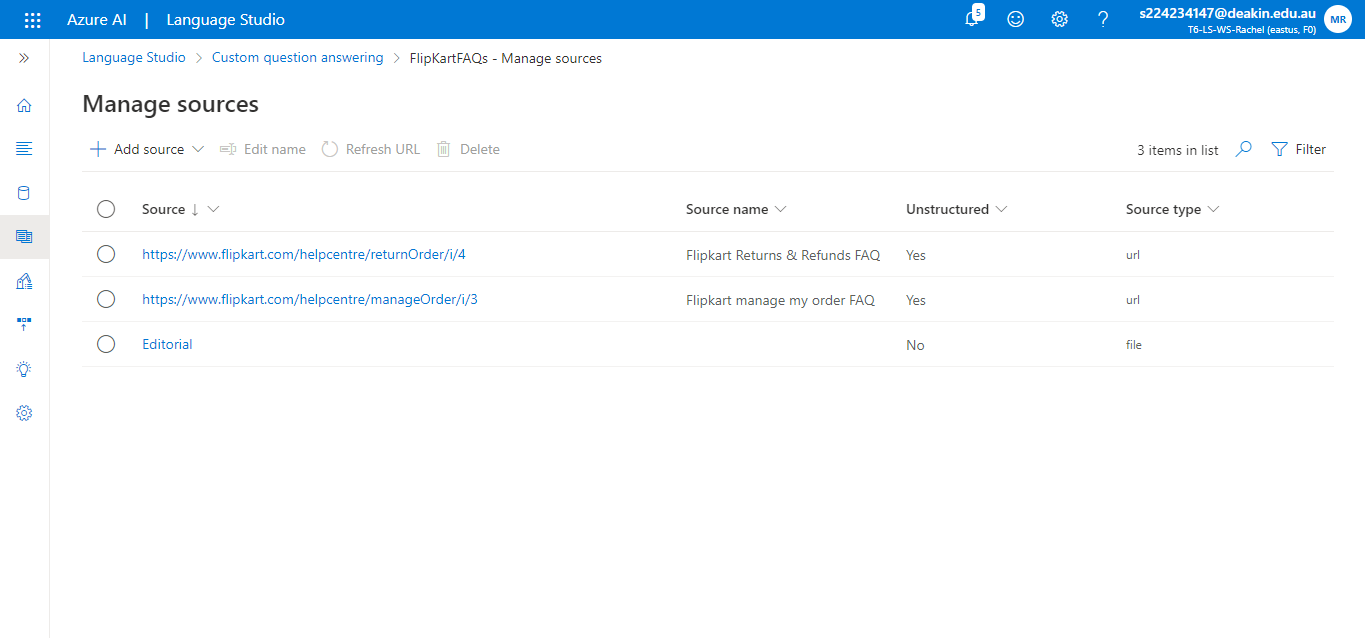

## ALL THE STORED KNOWLEDGE BASE FAQS IN QUESTION ANSWER PAIRS.

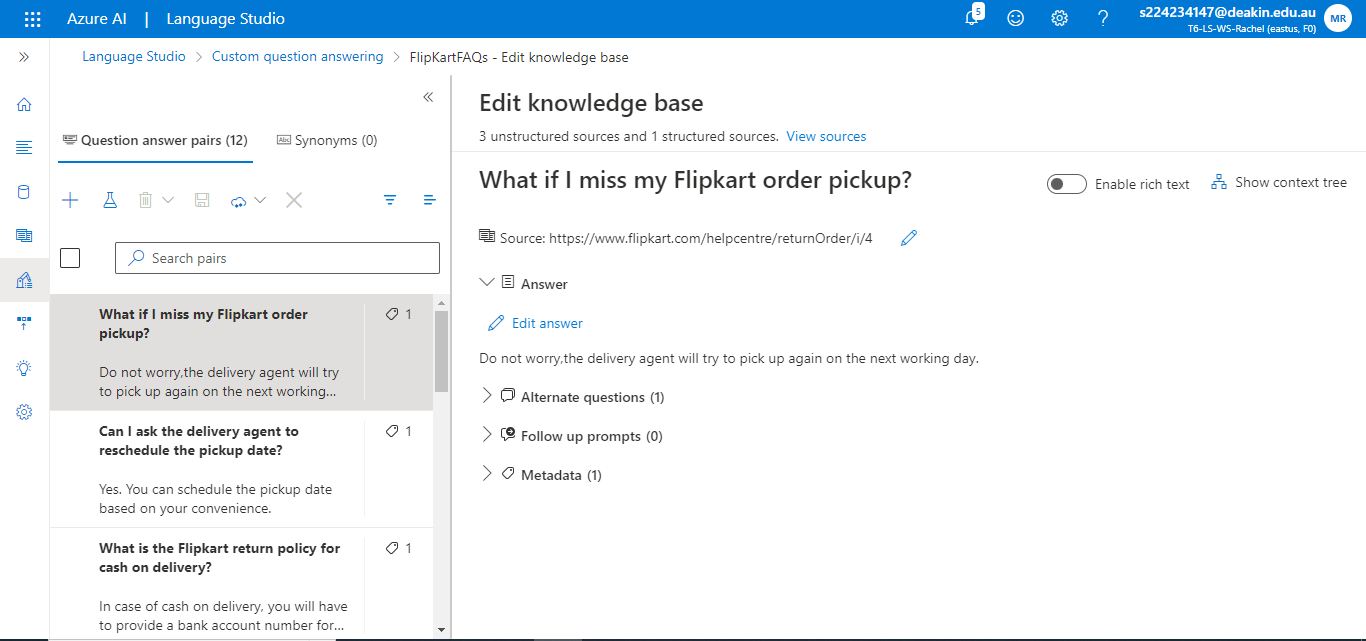

## DEPLOYED KNOWLEDGE BASE.
### THOUGH KNOWLEDGE BASE IS DEPLOYED IT IS READY TO CREATE A BOT.
* Through the [Documentation](https://learn.microsoft.com/en-us/azure/ai-services/language-service/question-answering/tutorials/bot-service) bot is created.
* click create a bot.

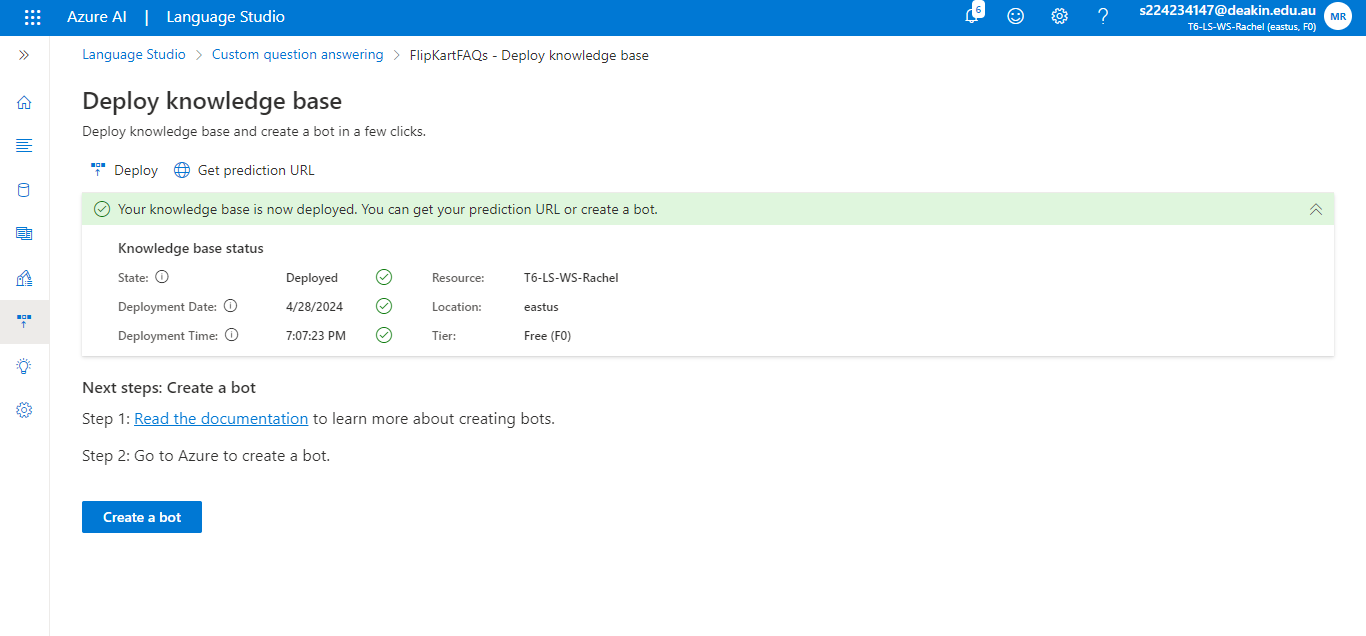

## AFTER THE DEPLOYMENT WE TEST BY ASKING QUESTIONS WITH MORE THAN 0.5 CONFIDENCE INTERVAL.

In [22]:
# 1. Test by asking a question
qna_client = QuestionAnsweringClient(endpoint, AzureKeyCredential(key))

with qna_client:
    question= "How do I place a request for order replacement?"
    output = qna_client.get_answers(
        question=question,
        top=3,
        confidence_threshold=0.5,
        include_unstructured_sources=True,
        short_answer_options=qna.ShortAnswerOptions(
            confidence_threshold=0.5,
            top=1
        ),
        project_name="FlipKartFAQs",
        deployment_name="test"
    )
    if output.answers:
        best_candidate = [a for a in output.answers if a.confidence and a.confidence > 0.5][0]
        print("Q: {}".format(question))
        print("A: {}".format(best_candidate.answer))
    else:
        print(f"No answers returned from question '{question}'")

Q: How do I place a request for order replacement?
A: Place a return request in the Orders page. You will get an option to choose refund/replace/exchange as per our return policy.


In [25]:
# 2. Testing by initiating a chit-chat.

qna_client = QuestionAnsweringClient(endpoint, AzureKeyCredential(key))
with qna_client:
    first_question= "Can I reinstate a cancelled order?"

    output = qna_client.get_answers(
        question=first_question,
        top=3,
        confidence_threshold=0.5,
        include_unstructured_sources=True,
        short_answer_options=qna.ShortAnswerOptions(
            confidence_threshold=0.5,
            top=1
        ),
        project_name="FlipKartFAQs",
        deployment_name="test"
    )
    if output.answers:
        best_candidate = [a for a in output.answers if a.confidence and a.confidence > 0.2][0]
        print(u"Q: {}".format(first_question))
        print(u"A: {}".format(best_candidate.answer))
        print('\n***********************************************************************************\n')
    else:
        print(f"No answers returned from question '{first_question}'")


    if best_candidate.qna_id:
        followup_question = "What is the Flipkart return policy for cash on delivery?"

        output = qna_client.get_answers(
            question=followup_question,
            top=3,
            confidence_threshold=0.5,
            answer_context=qna.KnowledgeBaseAnswerContext(
                previous_question=first_question,
                previous_qna_id=best_candidate.qna_id
            ),
            short_answer_options=qna.ShortAnswerOptions(
                confidence_threshold=0.5,
                top=1
            ),
            include_unstructured_sources=True,
            project_name="FlipKartFAQs",
            deployment_name="test"
        )
        if output.answers:
            print(u"Q: {}".format(followup_question))
            print(u"A: {}".format(output.answers[0].answer))
            print('\n***********************************************************************************\n')
        else:
            print(f"No answers returned from question '{followup_question}'")


Q: Can I reinstate a cancelled order?
A: No,a cancelled order can not be reinstated.


***********************************************************************************

Q: What is the Flipkart return policy for cash on delivery?
A: In case of cash on delivery, you will have to provide a bank account number for the refund.
For replacement/exchange, you will be given an alternate product for the returned product.

***********************************************************************************



## CREATING THE BOT WITH CUSTOM DEPLOYMENT
* Setting Same Resource Group.
* Same Region as 'East US'.
* Azure Bot as 'T6-LS-WS-Rachel-bot'
* pricing tier as free f0
* Microsoft App Id as Create New User Assigned Managed Identity.
* App name as 'T6-LS-WS-Rachel-bot-cc3f'.
* Sdk language as 'C#'
* Subscription Id and Endpoint from the resource group created.
* Create

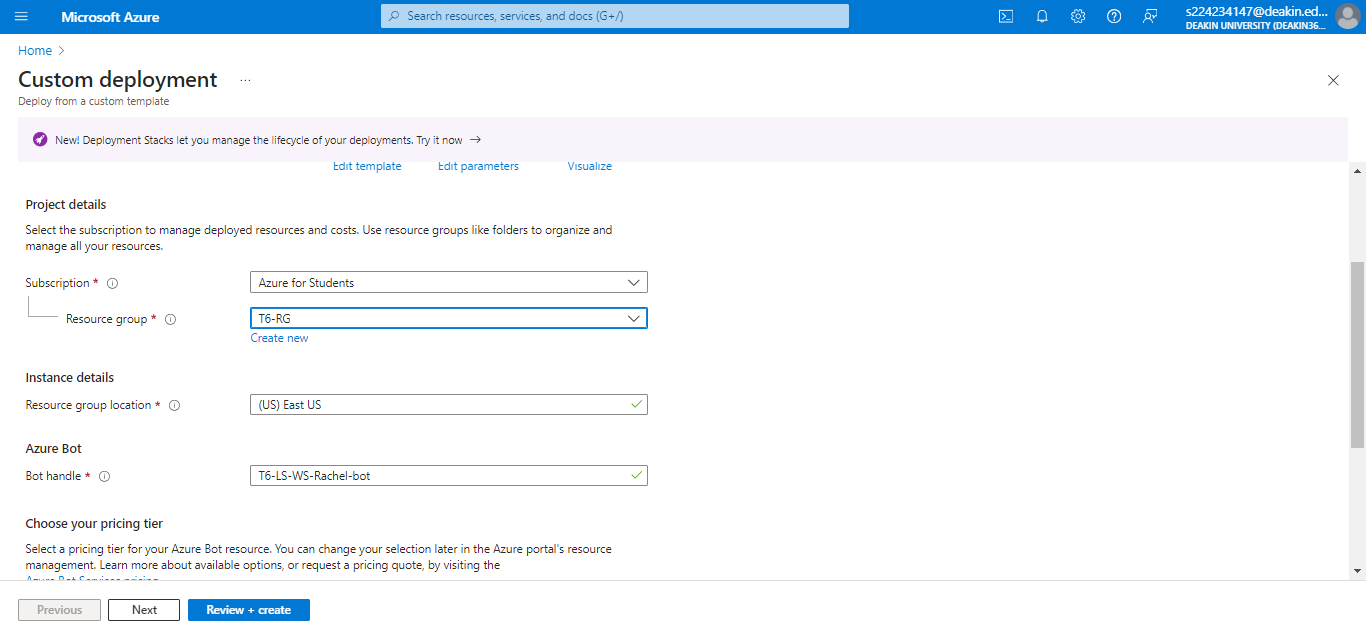

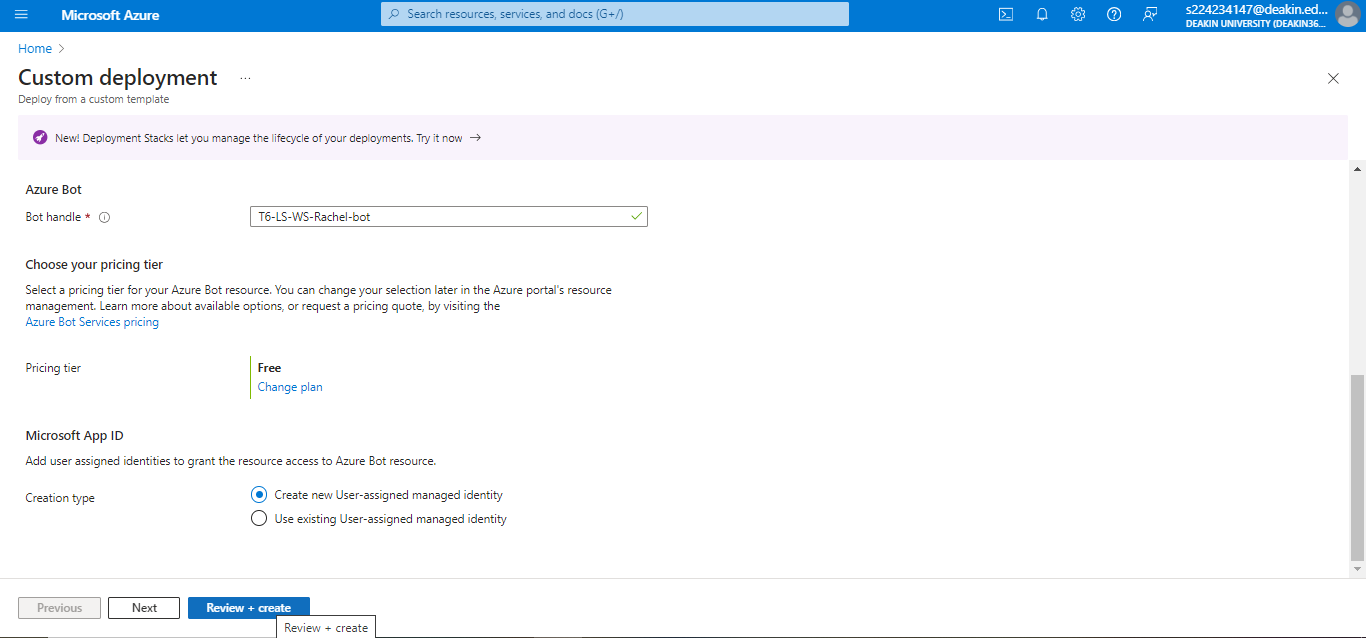

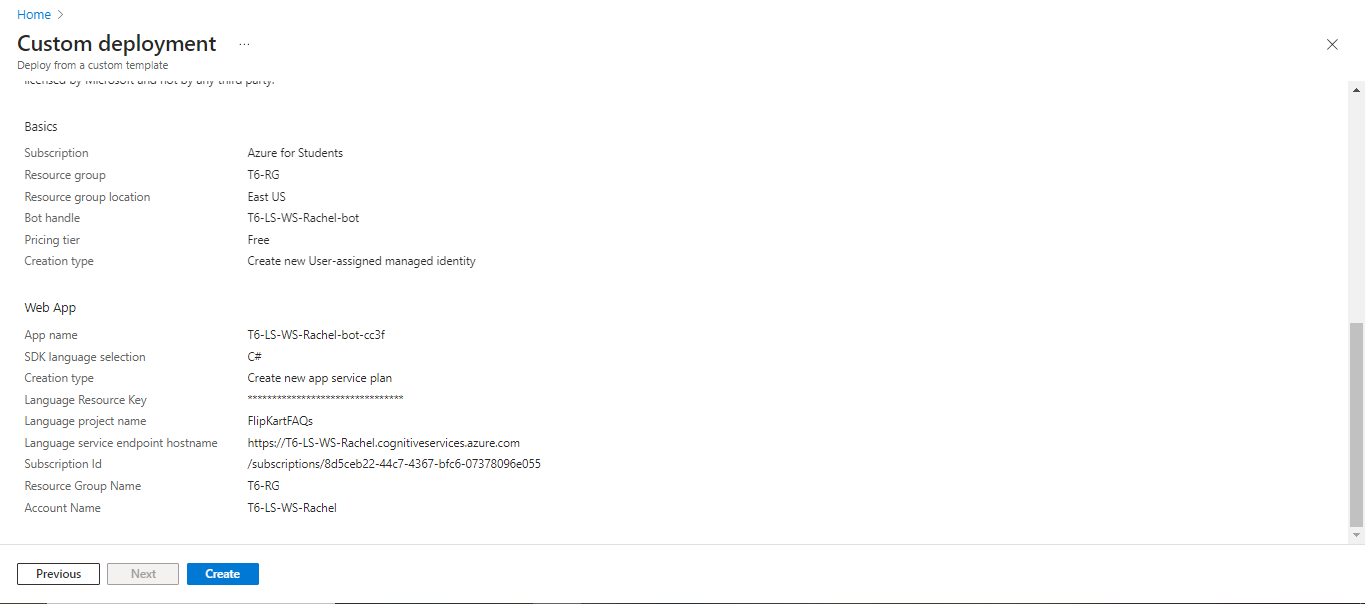

## Deployment is complete for Microsoft  template.

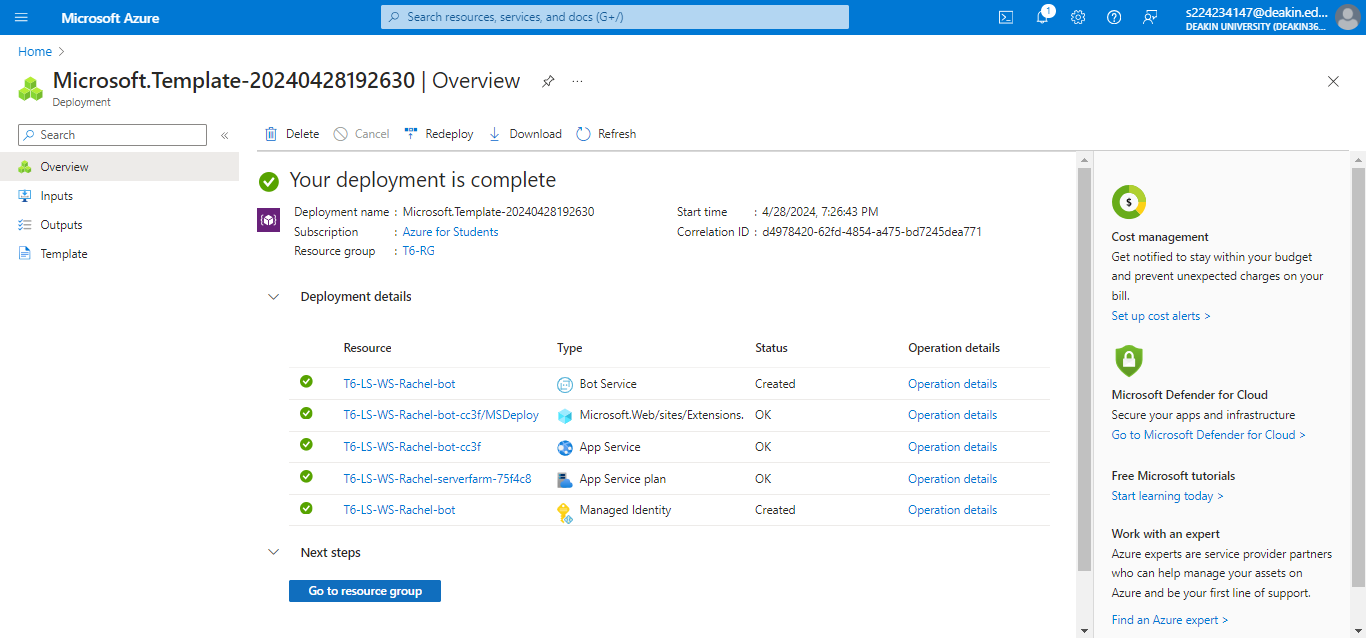

## At the Resource group search 'Bot Services' to access from Azure AI services.

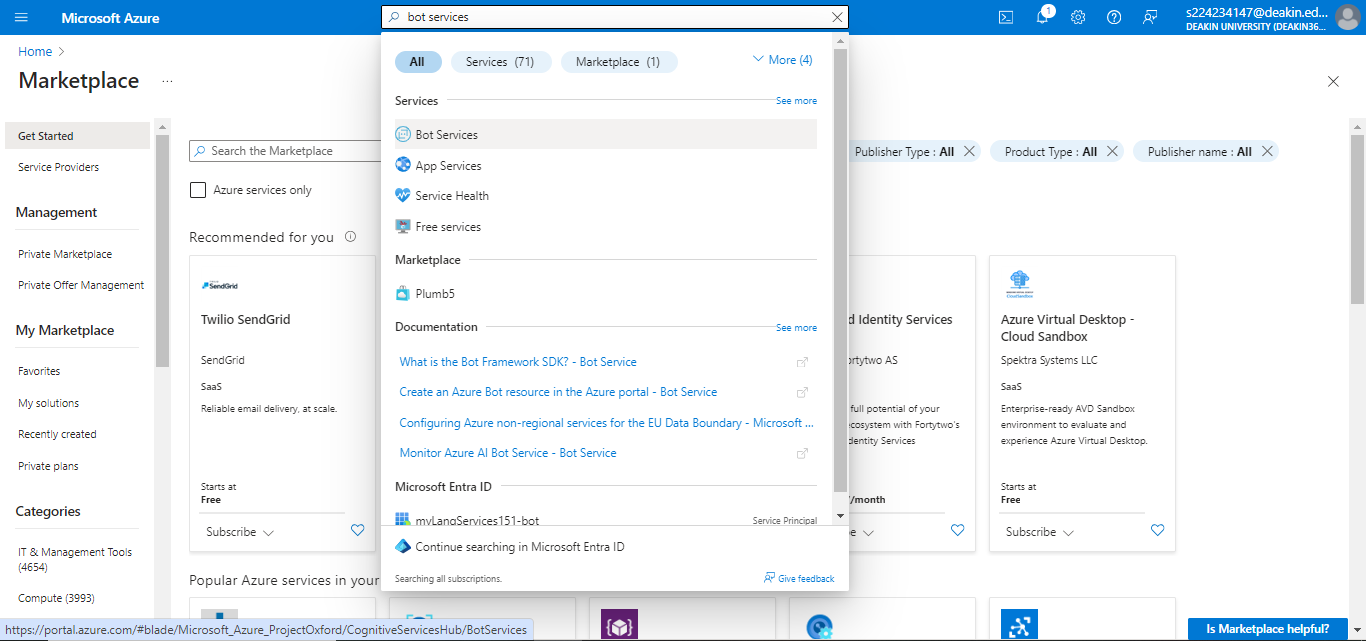

## OUR DEPLOYED BOT STORED IN BOT SERVICES

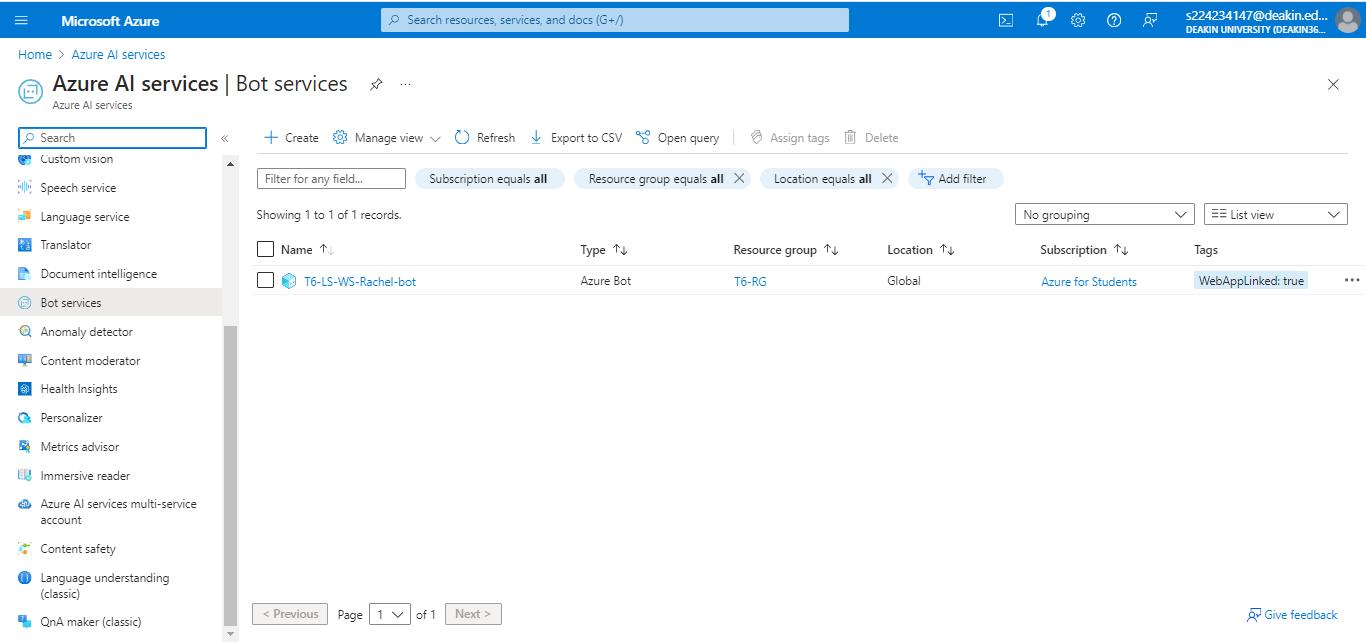

## IN AZURE BOT AT THE SETTING 'TEST  IN WEB CHAT'

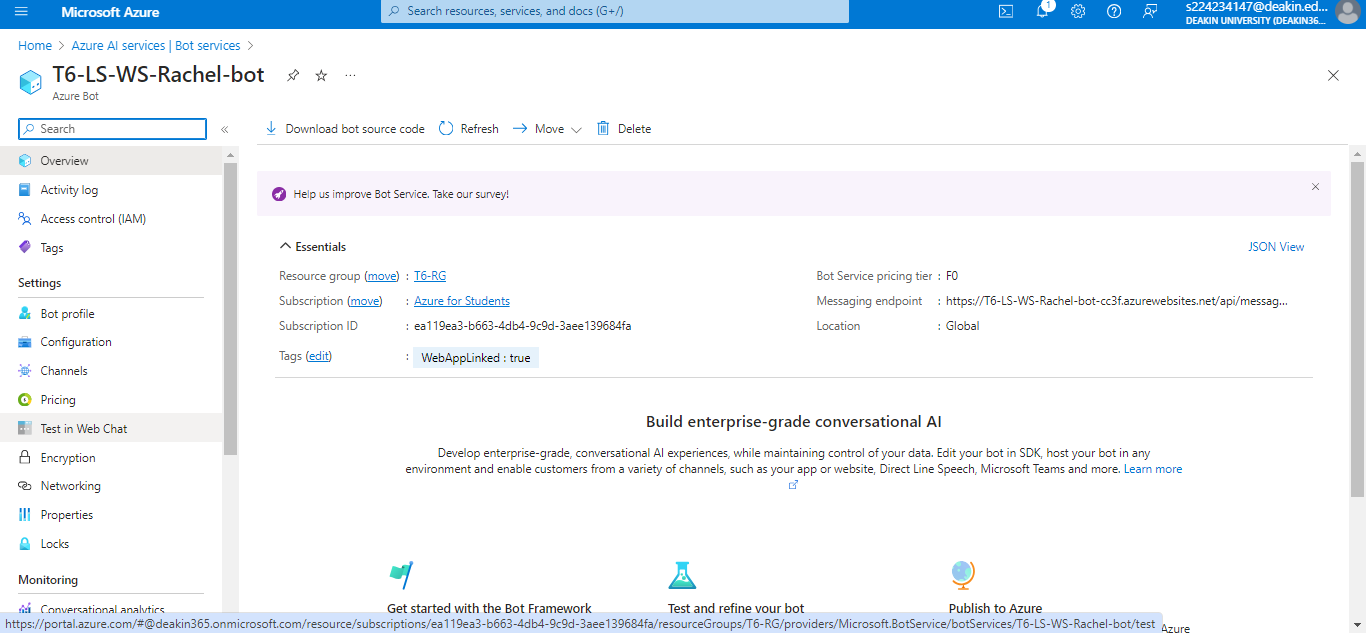

## TEST IN WEB CHAT IS HEALTHY AND SUCCESSFUL.

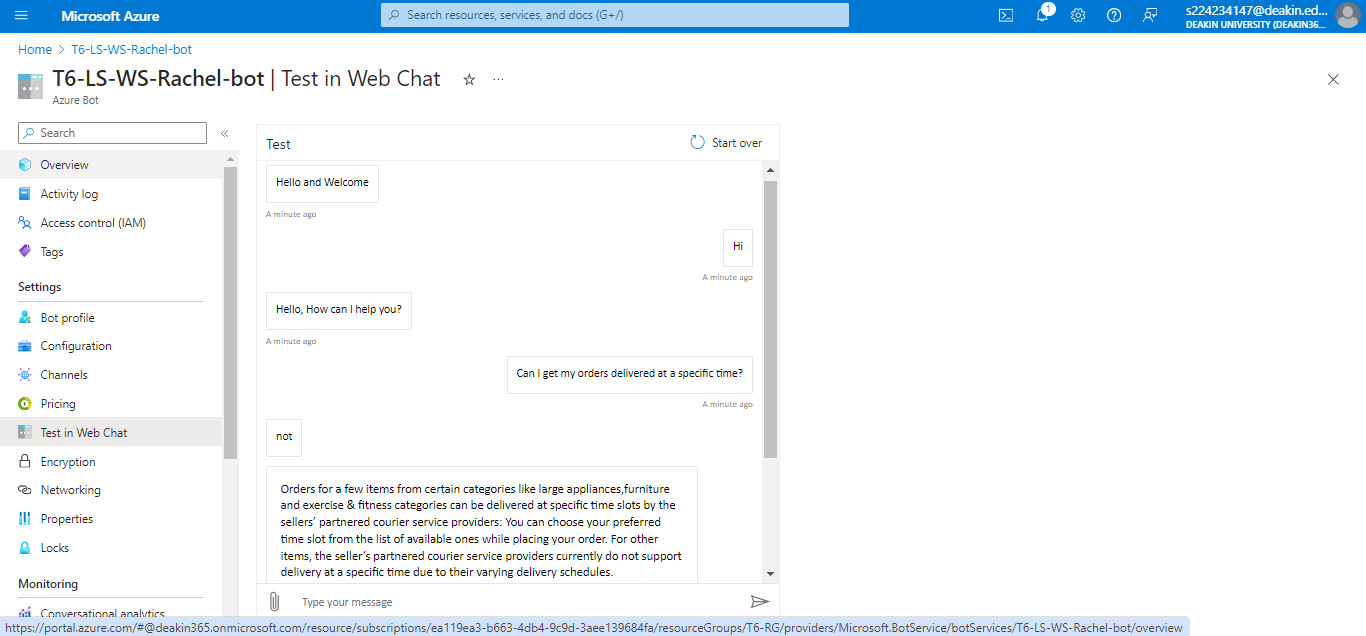

## ATTACH THE BOT TO THE CHANNEL 'TELEGRAM' FROM SETTINGS.

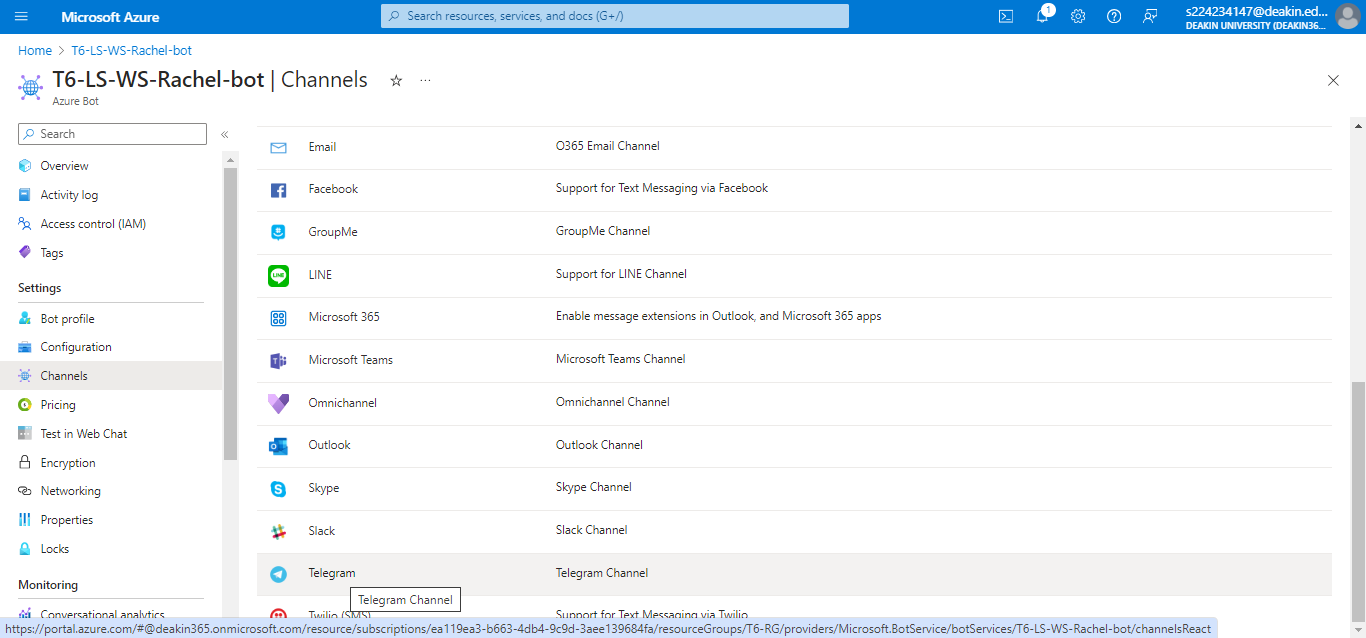

## THROUGH BOT FATHER WE CREATE OUR BOT AS 'Richie Flipkart' username as 'Jernah_bot'
* Successfully created Richie Flipkart bot 
* Copy the given token to access the HTTP API in azure.

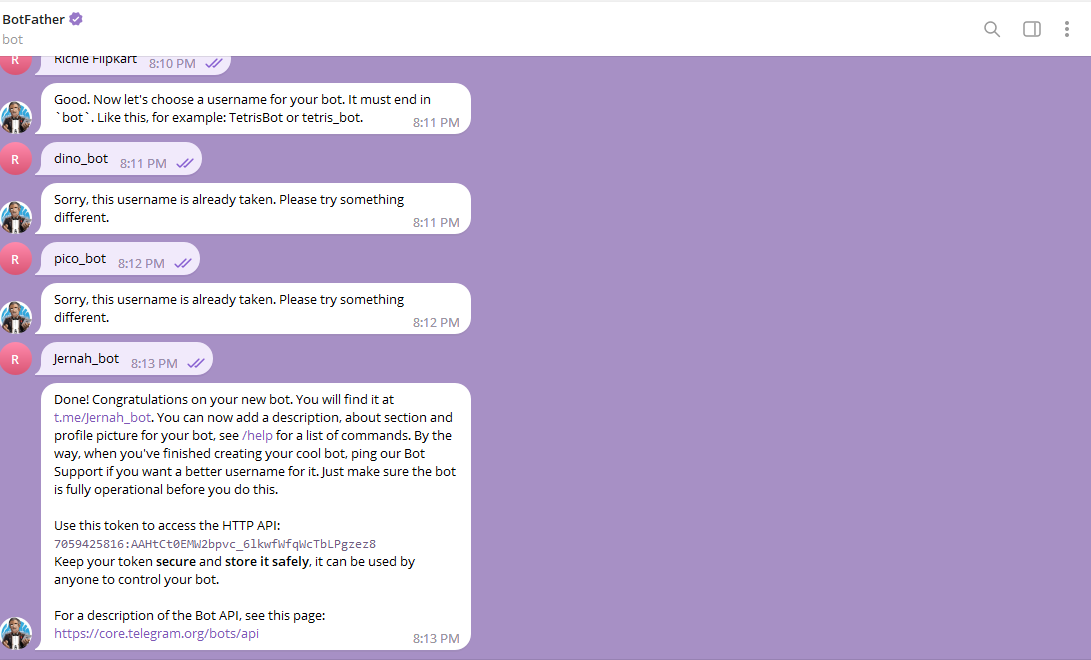

## Token from the telegram bot we created and pasted in access token and select apply.

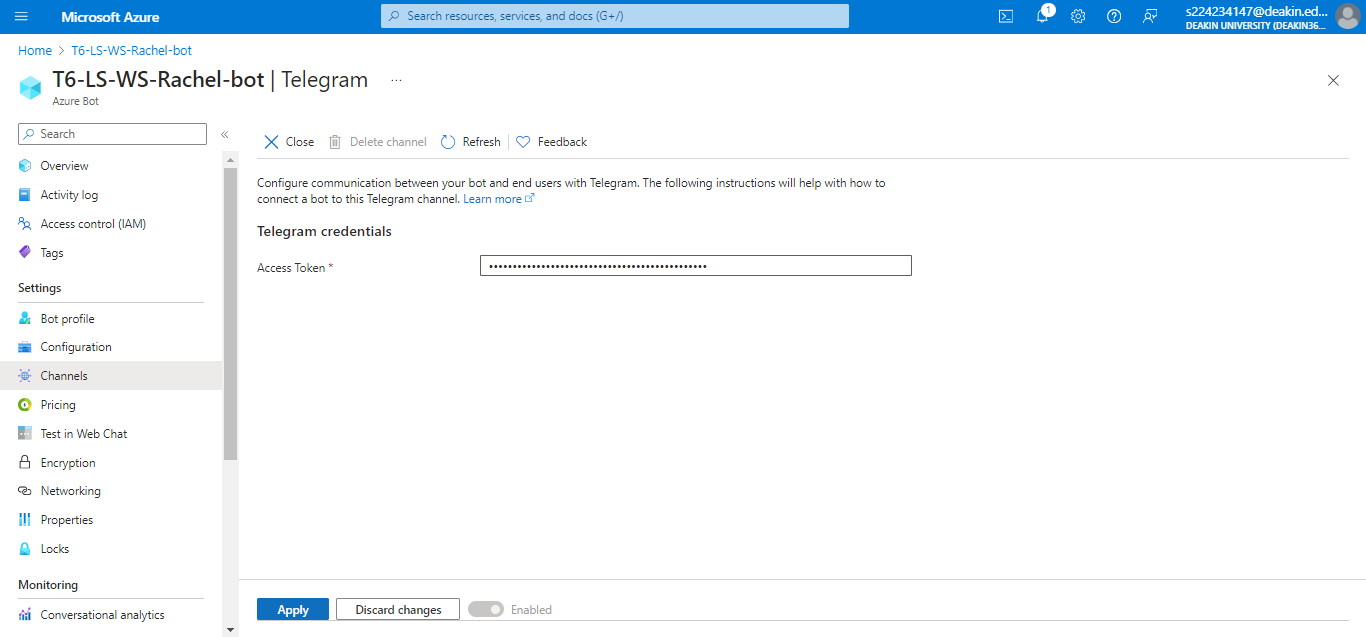

## Telegram channel is successfully enabled.

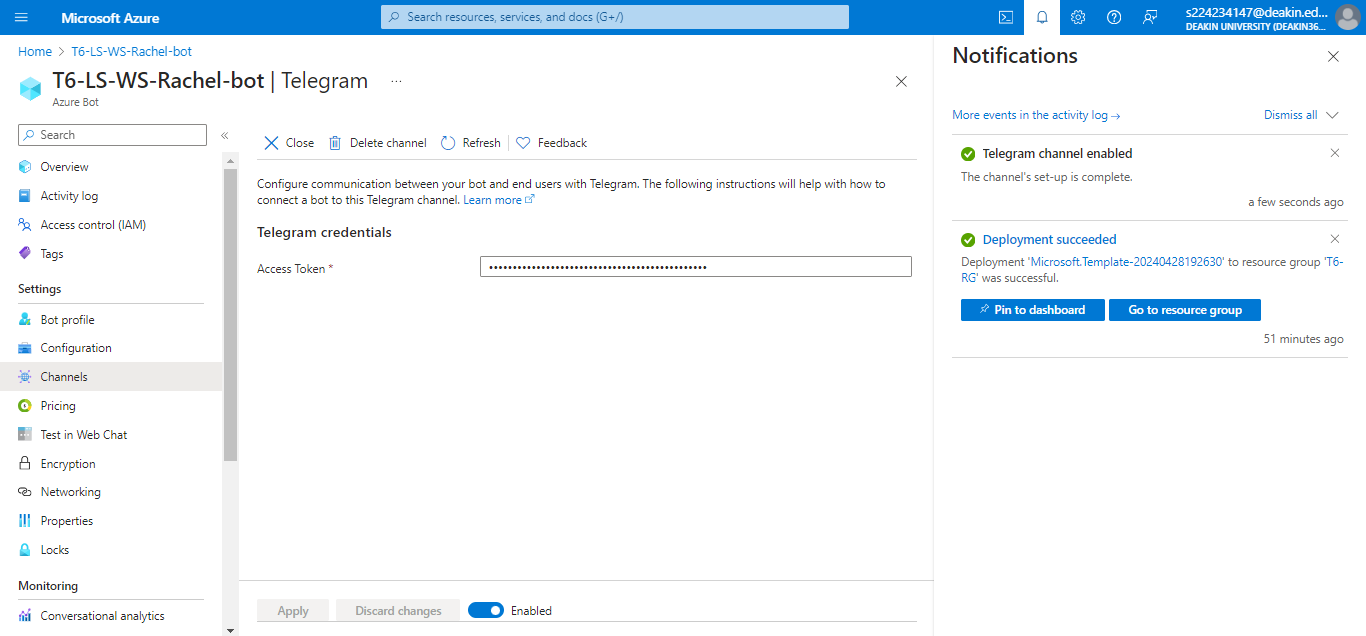

# Testing in the 'Richie Flipkart' bot in telegram with our deployed knowledge base works successfully.

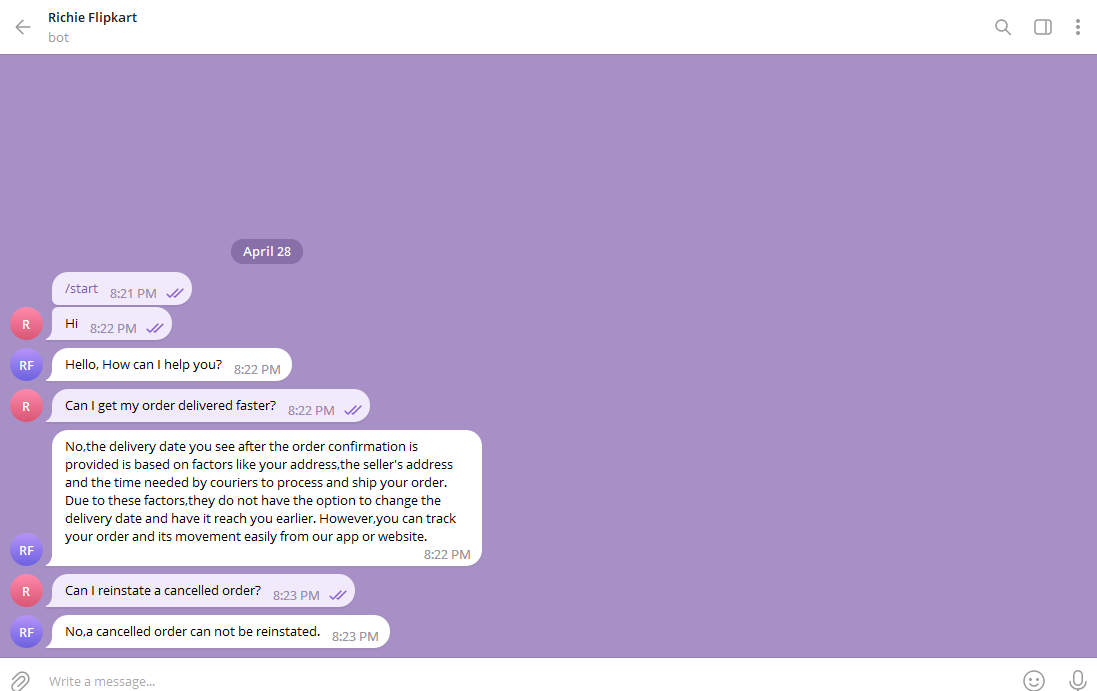

# Deleting the Resource Group.
* Confirm deletion for avoiding computational cost.

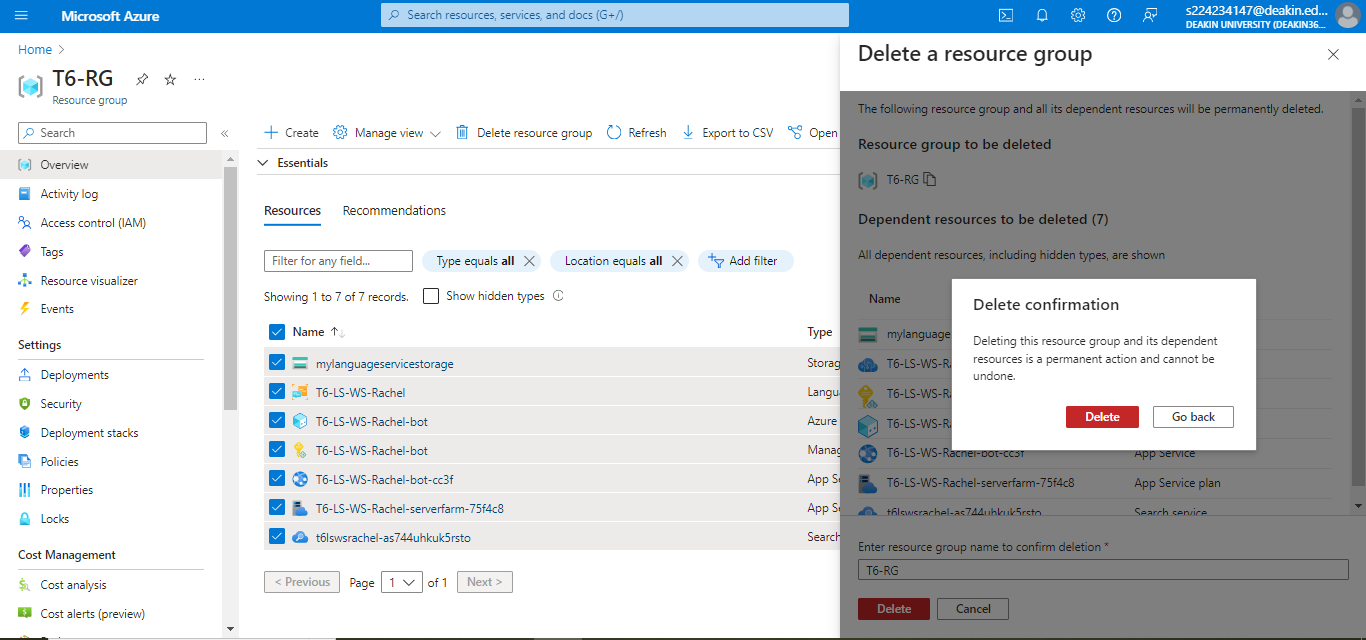

## REFERENCES:

1)jboback (2023). Tutorial: Create an FAQ bot with question answering and Azure AI Bot Service - Azure AI services. [online] learn.microsoft.com. Available at: https://learn.microsoft.com/en-us/azure/ai-services/language-service/question-answering/tutorials/bot-service.
